<a href="https://colab.research.google.com/github/pkapgatelive/EEG_Signals_GAMEEMO/blob/Read_Data/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Reading

In [1]:
# import Lib
import os
import pandas as pd
import glob
from google.colab import drive 
drive.mount('/content/drive')

# reading Data into dataframe

def read_data(all_files):
  g_df = []
  for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    g_df.append(df)
    frame = pd.concat(g_df, axis=0, ignore_index=True)
  return frame 

# Reading G1
def g1_df():
  path_g1 = '/content/drive/MyDrive/Colab Notebooks/EEG_game_signals/Data_Reading/Game/G1'
  g_all_files = glob.glob(path_g1 + "/*.csv")
  g1_df = read_data(g_all_files)
  return g1_df

# Reading G2
def g2_df():
  path_g2 = '/content/drive/MyDrive/Colab Notebooks/EEG_game_signals/Data_Reading/Game/G2'
  g_all_files = glob.glob(path_g2 + "/*.csv")
  g2_df = read_data(g_all_files)
  return g2_df

# Reading G3
def g2_df():
  path_g3 = '/content/drive/MyDrive/Colab Notebooks/EEG_game_signals/Data_Reading/Game/G3'
  g_all_files = glob.glob(path_g3 + "/*.csv")
  g3_df = read_data(g_all_files)
  return g3_df


# Reading G4
def g4_df():
  path_g4 = '/content/drive/MyDrive/Colab Notebooks/EEG_game_signals/Data_Reading/Game/G4'
  g_all_files = glob.glob(path_g4 + "/*.csv")
  g4_df = read_data(g_all_files)
  return g4_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA


## EDA For G4

In [2]:
g4_df().head()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,Unnamed: 14
0,-3.6154,0.7229,1.20530,5.0617,-5.0617,-5.06170,-16.6308,-1.20530,26.2718,7.4718,12.7745,12.2925,-0.7229,-4.09740,NaN
1,-9.6652,-4.1410,-2.24170,-0.5449,-11.9886,-9.09610,-24.7918,0.31351,10.5955,8.4695,7.6694,9.1446,1.2484,0.96897,NaN
2,-4.7468,-2.4462,0.30338,-0.5122,-10.7873,-11.44280,-28.1250,2.70480,-4.1402,9.4076,12.5119,7.6316,2.6198,0.42890,NaN
3,1.5638,3.2441,3.41820,11.3291,-4.5965,-0.87432,-15.5912,-2.03670,-2.4458,-2.4850,2.3612,4.0407,-3.5629,1.60800,NaN
4,-6.4840,-1.5298,2.00830,6.5520,-13.7205,-8.77560,-20.1994,1.21850,-3.0219,11.7641,7.2812,12.7159,-7.4467,3.19870,NaN


In [3]:
# Converting Fucntion into the Datafram
g4_df  = g4_df()

In [4]:
g4_df.dtypes

AF3            float64
AF4            float64
F3             float64
F4             float64
F7             float64
F8             float64
FC5            float64
FC6            float64
O1             float64
O2             float64
P7             float64
P8             float64
T7             float64
T8             float64
Unnamed: 14    float64
dtype: object

In [5]:
g4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071056 entries, 0 to 1071055
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   AF3          1071056 non-null  float64
 1   AF4          1071056 non-null  float64
 2   F3           1071056 non-null  float64
 3   F4           1071056 non-null  float64
 4   F7           1071056 non-null  float64
 5   F8           1071056 non-null  float64
 6   FC5          1071056 non-null  float64
 7   FC6          1071056 non-null  float64
 8   O1           1071056 non-null  float64
 9   O2           1071056 non-null  float64
 10  P7           1071056 non-null  float64
 11  P8           1071056 non-null  float64
 12  T7           1071056 non-null  float64
 13  T8           1071056 non-null  float64
 14  Unnamed: 14  0 non-null        float64
dtypes: float64(15)
memory usage: 122.6 MB


In [6]:
g4_df.describe()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,Unnamed: 14
count,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,1.071056e+06,0.0
mean,3.462016e-03,8.262746e-04,1.578127e-02,-4.094859e-03,1.160041e-02,-1.911126e-02,-2.942585e-02,1.836152e-02,1.146984e-03,1.201131e-02,9.897104e-03,1.270734e-02,5.768965e-04,5.227089e-03,NaN
std,2.123228e+01,1.847882e+01,2.017512e+01,1.740757e+01,3.022848e+01,2.608227e+01,1.852114e+01,1.629250e+01,1.898727e+01,1.377750e+01,1.600852e+01,1.758785e+01,2.037698e+01,1.555499e+01,NaN
min,-2.350000e+02,-2.349993e+02,-2.349994e+02,-2.349995e+02,-2.350000e+02,-2.524005e+03,-2.350000e+02,-2.349865e+02,-3.451997e+02,-2.253073e+02,-2.342032e+02,-5.491113e+02,-6.031399e+02,-2.337688e+02,NaN
25%,-7.582300e+00,-6.252300e+00,-5.735200e+00,-6.046900e+00,-8.772600e+00,-8.935900e+00,-6.184300e+00,-5.560800e+00,-6.552800e+00,-5.517500e+00,-6.039825e+00,-7.239400e+00,-7.040900e+00,-6.010425e+00,NaN
50%,-1.935050e-02,-6.623600e-02,9.517150e-02,2.284150e-02,1.875150e-02,-1.242650e-01,3.339100e-02,7.634550e-02,-3.934850e-02,2.139750e-02,7.442250e-02,9.643550e-02,1.607200e-01,1.031000e-01,NaN
75%,7.480400e+00,6.078900e+00,5.823900e+00,6.177200e+00,8.925600e+00,8.753900e+00,6.369700e+00,5.799225e+00,6.289800e+00,5.553100e+00,6.059300e+00,7.396825e+00,7.395800e+00,6.332925e+00,NaN
max,3.325032e+02,1.022669e+03,2.349995e+02,3.032220e+02,4.215760e+02,4.074050e+02,2.349831e+02,2.348006e+02,2.615968e+02,2.328945e+02,2.346893e+02,2.344009e+02,2.345536e+02,2.349932e+02,NaN


In [7]:
g4_df.count()

AF3            1071056
AF4            1071056
F3             1071056
F4             1071056
F7             1071056
F8             1071056
FC5            1071056
FC6            1071056
O1             1071056
O2             1071056
P7             1071056
P8             1071056
T7             1071056
T8             1071056
Unnamed: 14          0
dtype: int64

In [8]:
# Checking the Null Values
g4_df.drop("Unnamed: 14",axis=1, inplace  = True)

## EDA DF Col outliers

<Figure size 432x288 with 0 Axes>

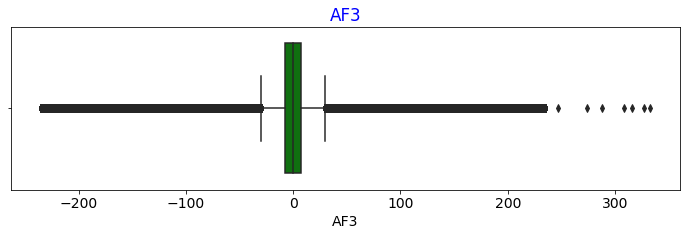

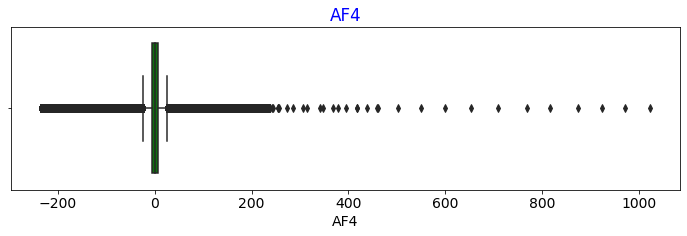

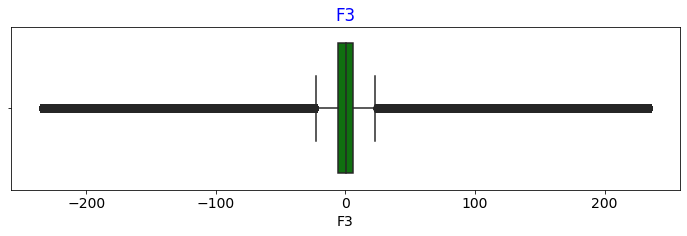

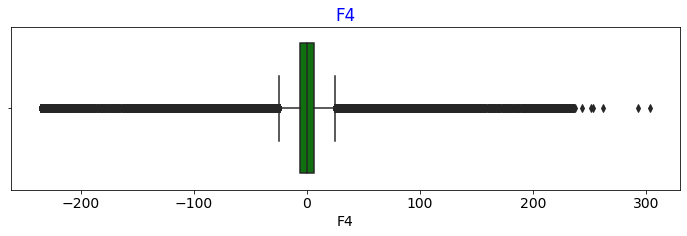

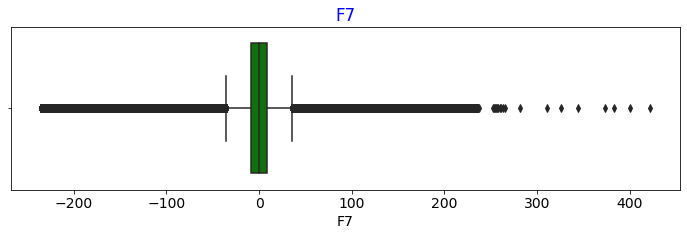

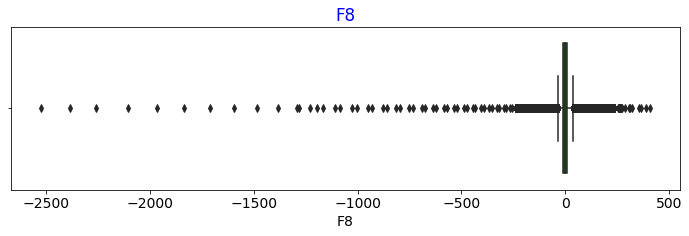

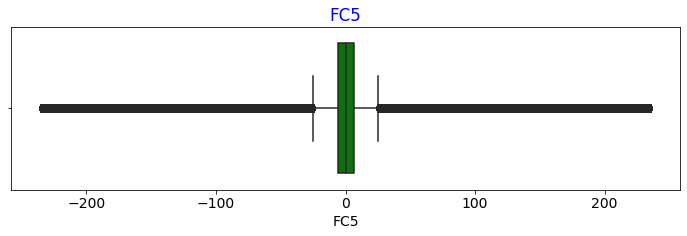

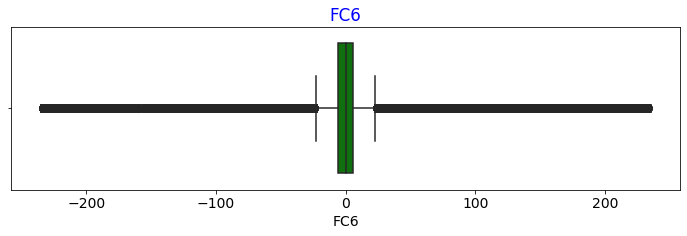

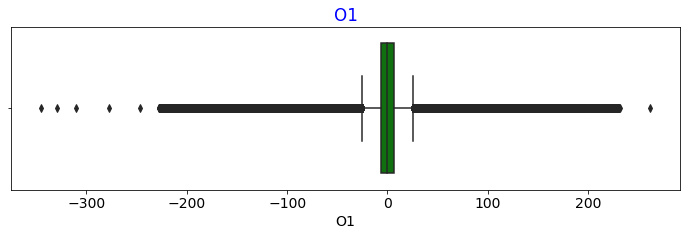

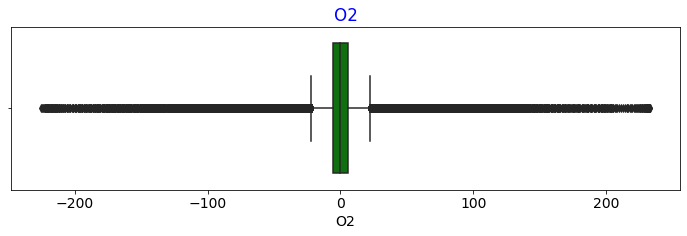

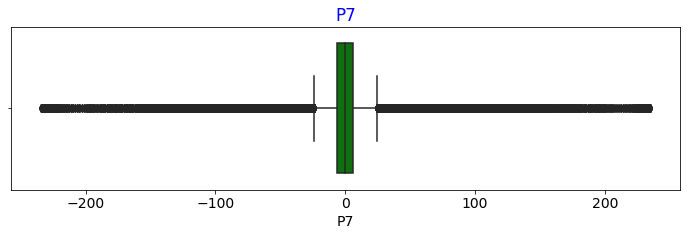

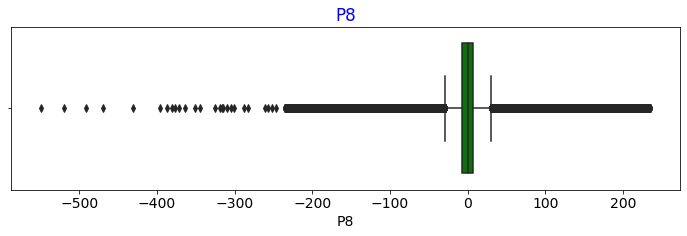

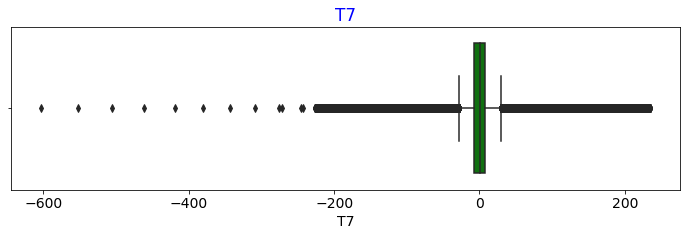

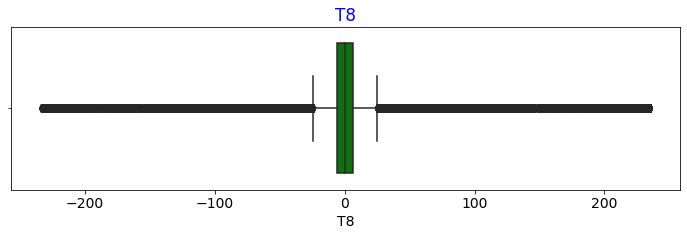

In [9]:
# Ploting All Columns to understand the Outliers. 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

cols=g4_df.select_dtypes('float64').columns
plt.suptitle("Outliers")
plt.rcParams.update({'font.size': 14})
for col in cols:
    f, a = plt.subplots(1,1,figsize=(12,3))
    plt.title(col,color="blue")
    print("\n\n\n")
    sns.boxplot(g4_df[col], color="green")
    plt.show()

## EDA Functions

In [10]:
# Print the col
col_list = []
col_list = g4_df.columns
col_list

Index(['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7',
       'P8', 'T7', 'T8'],
      dtype='object')

In [11]:
def col_describe(col):
  return g4_df[col].describe()

def check_quantile(col):
  return g4_df[col].quantile([0.0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])


def outliers_treatment(col, pos_quant, neg_quant, df):
  # Positive outliers treatment
  
  g4_df = df
  g4_df = g4_df[g4_df[col] < g4_df[col].quantile(pos_quant)]

  # Negative Outliers Treatment
  g4_df = g4_df[g4_df[col] > g4_df[col].quantile(neg_quant)]
  return g4_df


#Checking the Outlier again
def outlier_visua(df,var1):
  g4_df = df
  plt.figure(figsize=[10,2])
  plt.rcParams.update({'font.size': 14})
  sns.boxplot(g4_df[col_list[var1]],color="green")
  plt.show()

## AF3 Outliers Treatment




In [12]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[0]+" -------------------")
print(col_describe(col_list[0]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[0]))

--------------Describing Col: --> AF3 -------------------
count    1.071056e+06
mean     3.462016e-03
std      2.123228e+01
min     -2.350000e+02
25%     -7.582300e+00
50%     -1.935050e-02
75%      7.480400e+00
max      3.325032e+02
Name: AF3, dtype: float64


--------------Checking Quantile-------------------
0.00   -235.000000
0.01    -58.649380
0.05    -24.878325
0.10    -16.806950
0.25     -7.582300
0.50     -0.019350
0.70      5.641300
0.90     17.243100
0.95     26.074725
0.99     58.851690
Name: AF3, dtype: float64


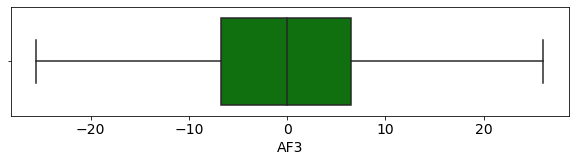



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000,966627.000000
mean,-0.040064,-0.121470,0.072290,0.049872,-0.138265,-0.173545,-0.039844,-0.024132,-0.114827,0.027448,-0.051282,0.066903,-0.007214,0.037181
std,10.245033,14.473515,18.227903,15.840027,25.274089,22.100559,15.906968,14.011344,16.958931,12.432880,14.656670,15.247819,18.521637,14.057633
min,-25.548800,-234.999300,-234.999400,-234.999500,-235.000000,-2524.005400,-235.000000,-234.757400,-310.502600,-225.307300,-233.105200,-363.939800,-226.633200,-233.423100
25%,-6.706800,-5.891600,-5.386300,-5.749850,-8.338850,-8.476450,-5.911600,-5.299000,-6.301400,-5.219900,-5.737650,-6.842500,-6.657050,-5.673100
50%,-0.051054,-0.091249,0.115900,0.041384,-0.039784,-0.143820,0.006176,0.065733,-0.063165,0.039175,0.078893,0.132270,0.170270,0.123110
75%,6.505800,5.628200,5.539750,5.932900,8.339500,8.223500,6.017800,5.501250,5.962600,5.309050,5.774350,7.085150,7.047000,6.067350
max,26.074700,416.593000,234.999500,261.382900,234.892800,234.988200,234.983100,234.463400,228.932400,231.753100,234.520900,233.639600,227.730600,234.993200


In [13]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[0],0.95,0.05,g4_df)
outlier_visua(g4_df,0)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## AF4 Outliers Treatment

In [14]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[1]+" -------------------")
print(col_describe(col_list[1]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[1]))


--------------Describing Col: --> AF4 -------------------
count    966627.000000
mean         -0.121470
std          14.473515
min        -234.999300
25%          -5.891600
50%          -0.091249
75%           5.628200
max         416.593000
Name: AF4, dtype: float64


--------------Checking Quantile-------------------
0.00   -234.999300
0.01    -34.540832
0.05    -19.177370
0.10    -13.324220
0.25     -5.891600
0.50     -0.091249
0.70      4.205400
0.90     12.981840
0.95     18.815800
0.99     34.240666
Name: AF4, dtype: float64


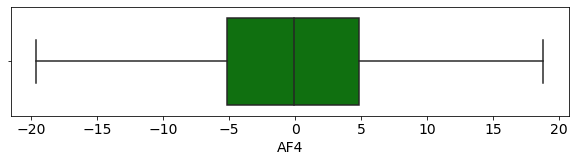



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000,872379.000000
mean,-0.086286,-0.180612,0.069067,0.032238,-0.099830,-0.140192,0.048859,-0.054569,-0.100013,-0.026252,-0.006912,0.086401,0.028186,0.033738
std,9.965502,7.848455,17.184662,13.476749,24.086617,19.161314,14.780965,13.082449,15.293604,11.909645,13.394373,14.287631,17.854802,13.537610
min,-25.548800,-19.625600,-234.999100,-234.999400,-234.996200,-1107.533300,-235.000000,-234.703300,-217.227700,-225.307300,-233.105200,-234.587100,-226.633200,-233.322400
25%,-6.521900,-5.179850,-5.081550,-5.444000,-7.968400,-7.969600,-5.553900,-5.062500,-5.927300,-4.999600,-5.392250,-6.532000,-6.363050,-5.425800
50%,-0.090378,-0.115180,0.118490,0.046326,-0.034488,-0.141350,0.033264,0.056432,-0.054824,0.012086,0.085407,0.143450,0.174370,0.114920
75%,6.227750,4.858100,5.251300,5.639100,8.003950,7.718300,5.743250,5.235000,5.630500,5.008650,5.462000,6.805850,6.765650,5.799300
max,26.074700,18.815600,234.999500,234.656600,234.775900,234.988200,234.983100,233.837200,228.932400,231.753100,234.520900,233.639600,227.730600,234.993200


In [15]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[1],0.95,0.05,g4_df)
outlier_visua(g4_df,1)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

AF4 Outliers Treatment

## F3 Outliers Treatment

In [16]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[2]+" -------------------")
print(col_describe(col_list[2]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[2]))

--------------Describing Col: --> F3 -------------------
count    872379.000000
mean          0.069067
std          17.184662
min        -234.999100
25%          -5.081550
50%           0.118490
75%           5.251300
max         234.999500
Name: F3, dtype: float64


--------------Checking Quantile-------------------
0.00   -234.999100
0.01    -36.465206
0.05    -17.295410
0.10    -11.819920
0.25     -5.081550
0.50      0.118490
0.70      3.970500
0.90     11.867600
0.95     17.180810
0.99     34.801130
Name: F3, dtype: float64


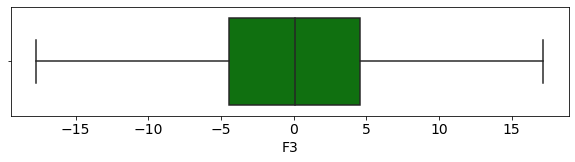



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000,787322.000000
mean,-0.129252,-0.202479,0.026256,0.017291,-0.084944,-0.134679,0.023451,-0.027792,-0.090672,0.027804,0.040004,0.120813,0.022116,0.066483
std,9.710509,7.655614,7.073741,11.155055,23.476741,17.810762,13.971168,12.455921,13.756000,11.290501,12.295305,13.369090,17.183487,13.087680
min,-25.548800,-19.625600,-17.726600,-234.999300,-234.995700,-1107.533300,-235.000000,-234.703300,-217.227700,-225.307300,-233.105200,-234.510800,-226.633200,-233.322400
25%,-6.337400,-5.034375,-4.456175,-5.137075,-7.741300,-7.648675,-5.259500,-4.794100,-5.561200,-4.757600,-5.070400,-6.277800,-6.061400,-5.156700
50%,-0.121565,-0.134210,0.097492,0.018398,-0.018529,-0.136120,0.025792,0.063121,-0.034568,0.034410,0.111600,0.152965,0.185985,0.130280
75%,5.977800,4.670500,4.568075,5.266700,7.811500,7.401700,5.420950,4.987800,5.339500,4.821475,5.212600,6.576475,6.502400,5.581000
max,26.074200,18.815600,17.180800,233.500600,234.617300,234.988200,234.983100,233.837200,228.932400,231.753100,234.520900,233.066600,227.730600,234.993200


In [17]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[2],0.95,0.05,g4_df)
outlier_visua(g4_df,2)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## F4 Outliers Treatment

In [18]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[3]+" -------------------")
print(col_describe(col_list[3]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[3]))

--------------Describing Col: --> F4 -------------------
count    787322.000000
mean          0.017291
std          11.155055
min        -234.999300
25%          -5.137075
50%           0.018398
75%           5.266700
max         233.500600
Name: F4, dtype: float64


--------------Checking Quantile-------------------
0.00   -234.999300
0.01    -28.788248
0.05    -16.270785
0.10    -11.358500
0.25     -5.137075
0.50      0.018398
0.70      3.999100
0.90     11.625500
0.95     16.637995
0.99     28.694911
Name: F4, dtype: float64


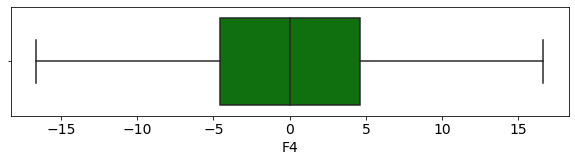



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000,710557.000000
mean,-0.133671,-0.212101,0.032135,0.023462,-0.143706,-0.147707,-0.015097,-0.036192,-0.116401,0.040275,-0.027119,0.120777,0.020172,0.094692
std,9.440422,7.433668,6.816973,6.911175,23.625702,16.666108,13.546375,12.101867,12.732343,10.808540,11.334887,12.744750,16.889987,12.814006
min,-25.548800,-19.625600,-17.726600,-16.638400,-234.995700,-1107.533300,-235.000000,-234.703300,-217.227700,-225.307300,-233.105200,-234.510800,-226.633200,-233.322400
25%,-6.113600,-4.846800,-4.229800,-4.540300,-7.593000,-7.276600,-4.972700,-4.522700,-5.247800,-4.527000,-4.830200,-5.988700,-5.825000,-4.951900
50%,-0.125510,-0.143220,0.094001,-0.003116,-0.050394,-0.153180,0.015674,0.070696,-0.050036,0.036258,0.083066,0.150820,0.184280,0.151170
75%,5.751300,4.462900,4.353800,4.591200,7.588400,6.984500,5.087200,4.748400,4.977200,4.608100,4.879700,6.291600,6.262400,5.425000
max,26.074200,18.815600,17.180800,16.637900,234.617300,234.988200,234.983100,232.860600,213.740200,231.753100,227.586300,233.066600,227.730600,234.993200


In [19]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[3],0.95,0.05,g4_df)
outlier_visua(g4_df,3)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## F7 Outliers Treatment

In [20]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[4]+" -------------------")
print(col_describe(col_list[4]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[4]))




--------------Describing Col: --> F7 -------------------
count    710557.000000
mean         -0.143706
std          23.625702
min        -234.995700
25%          -7.593000
50%          -0.050394
75%           7.588400
max         234.617300
Name: F7, dtype: float64


--------------Checking Quantile-------------------
0.00   -234.995700
0.01    -63.345100
0.05    -25.133140
0.10    -17.056300
0.25     -7.593000
0.50     -0.050394
0.70      5.695120
0.90     17.244900
0.95     25.350440
0.99     58.501996
Name: F7, dtype: float64


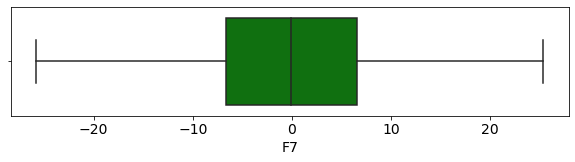



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000,641277.000000
mean,-0.142602,-0.195909,0.051629,0.039842,-0.065380,-0.080372,-0.020970,-0.047999,-0.125937,0.011368,-0.014957,0.158611,0.025207,0.113008
std,9.209148,7.310957,6.746243,6.861063,10.289146,14.672499,12.634291,11.844561,12.454844,10.712572,11.065605,12.147235,16.540000,12.658279
min,-25.548800,-19.625600,-17.726600,-16.638400,-25.811800,-569.046800,-235.000000,-234.703300,-217.227700,-225.307300,-233.105200,-234.510800,-226.633200,-233.101400
25%,-5.941600,-4.706900,-4.142100,-4.461600,-6.692800,-6.805100,-4.739100,-4.447200,-5.220500,-4.463200,-4.760500,-5.778500,-5.786400,-4.833600
50%,-0.134920,-0.122350,0.115950,0.012559,-0.082605,-0.101040,-0.003513,0.077425,-0.073479,0.018402,0.070618,0.155660,0.169140,0.166770
75%,5.568200,4.369700,4.305600,4.549700,6.577000,6.665300,4.801800,4.692300,4.885000,4.501000,4.797800,6.087500,6.192200,5.341200
max,26.074200,18.815600,17.180800,16.637900,25.350200,234.902400,234.983100,231.023200,212.383200,231.753100,227.586300,230.282100,227.730600,234.993200


In [21]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[4],0.95,0.05,g4_df)
outlier_visua(g4_df,4)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## F8 Outliers Treatment

In [22]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[5]+" -------------------")
print(col_describe(col_list[5]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[5]))




--------------Describing Col: --> F8 -------------------
count    641277.000000
mean         -0.080372
std          14.672499
min        -569.046800
25%          -6.805100
50%          -0.101040
75%           6.665300
max         234.902400
Name: F8, dtype: float64


--------------Checking Quantile-------------------
0.00   -569.046800
0.01    -33.748152
0.05    -20.085460
0.10    -14.496800
0.25     -6.805100
0.50     -0.101040
0.70      5.045700
0.90     14.518620
0.95     20.314360
0.99     34.548600
Name: F8, dtype: float64


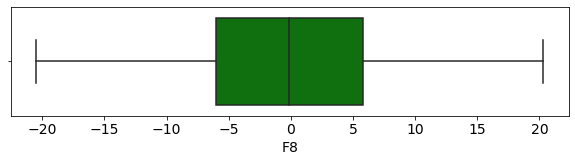



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000,578752.000000
mean,-0.176750,-0.177687,0.087045,0.059527,-0.023187,-0.110144,-0.030116,0.015357,-0.161628,-0.010738,-0.042054,0.126706,0.027232,0.110914
std,9.039311,7.072287,6.588662,6.697065,10.018822,8.740913,11.936889,11.178488,11.535182,10.562318,10.387656,11.406165,16.247501,12.212031
min,-25.548800,-19.625600,-17.726600,-16.638400,-25.811800,-20.499400,-235.000000,-234.703300,-216.093300,-225.307300,-233.105200,-234.333400,-226.633200,-233.101400
25%,-5.835825,-4.509700,-3.968725,-4.297825,-6.423725,-6.029600,-4.497625,-4.232725,-4.958200,-4.339625,-4.555700,-5.576900,-5.575400,-4.667225
50%,-0.158165,-0.113610,0.137435,0.021514,-0.052604,-0.131435,-0.007320,0.093149,-0.081288,0.009702,0.063579,0.122205,0.190385,0.165935
75%,5.407325,4.203400,4.203800,4.415225,6.384100,5.801400,4.552900,4.532450,4.603100,4.340800,4.560700,5.783125,6.037200,5.168025
max,26.074200,18.815600,17.180800,16.637900,25.350200,20.314300,234.983100,229.906500,171.697000,231.753100,177.038500,230.282100,227.730600,234.990100


In [23]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[5],0.95,0.05,g4_df)
outlier_visua(g4_df,5)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## FC5 Outliers Treatment

In [24]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[6]+" -------------------")
print(col_describe(col_list[6]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[6]))




--------------Describing Col: --> FC5 -------------------
count    578752.000000
mean         -0.030116
std          11.936889
min        -235.000000
25%          -4.497625
50%          -0.007320
75%           4.552900
max         234.983100
Name: FC5, dtype: float64


--------------Checking Quantile-------------------
0.00   -235.000000
0.01    -26.094935
0.05    -14.503035
0.10    -10.007500
0.25     -4.497625
0.50     -0.007320
0.70      3.429170
0.90     10.224290
0.95     14.818550
0.99     26.274796
Name: FC5, dtype: float64


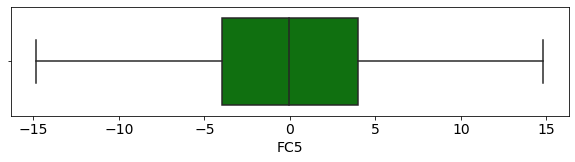



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000,522323.000000
mean,-0.149755,-0.183676,0.114874,0.055082,-0.046395,-0.128000,-0.002035,0.049898,-0.161228,0.017933,-0.042678,0.131054,0.030601,0.128187
std,8.852830,6.879209,6.395116,6.524660,9.676950,8.492793,6.076278,10.610850,10.481745,10.072627,9.501284,10.867430,16.184915,12.003664
min,-25.548300,-19.625600,-17.726600,-16.638400,-25.811800,-20.499000,-14.841700,-234.703300,-188.028000,-225.307300,-231.101700,-234.333400,-226.633200,-233.101400
25%,-5.655100,-4.364400,-3.795600,-4.158900,-6.161250,-5.827700,-3.972500,-3.979500,-4.680500,-4.103100,-4.291100,-5.302700,-5.370650,-4.485200
50%,-0.131140,-0.117730,0.155370,0.011786,-0.076498,-0.150380,-0.026909,0.108060,-0.094109,0.031742,0.066862,0.140150,0.193850,0.167320
75%,5.294400,4.051200,4.076800,4.262700,6.073150,5.554250,3.959850,4.336050,4.303850,4.159750,4.310000,5.548750,5.845200,4.984050
max,26.074200,18.815500,17.180800,16.637900,25.350000,20.314300,14.818100,228.068000,159.497200,231.753100,173.122200,230.282100,227.730600,234.990100


In [25]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[6],0.95,0.05,g4_df)
outlier_visua(g4_df,6)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## FC6 Outliers Treatment

In [26]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[7]+" -------------------")
print(col_describe(col_list[7]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[7]))




--------------Describing Col: --> FC6 -------------------
count    522323.000000
mean          0.049898
std          10.610850
min        -234.703300
25%          -3.979500
50%           0.108060
75%           4.336050
max         228.068000
Name: FC6, dtype: float64


--------------Checking Quantile-------------------
0.00   -234.703300
0.01    -30.047836
0.05    -14.196230
0.10     -9.416400
0.25     -3.979500
0.50      0.108060
0.70      3.286900
0.90      9.835580
0.95     14.556960
0.99     27.623828
Name: FC6, dtype: float64


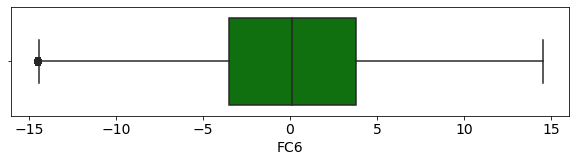



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000,471395.000000
mean,-0.167807,-0.186460,0.093123,0.010214,-0.061426,-0.179218,-0.013892,0.123181,-0.115204,0.039533,-0.026638,0.095793,0.082126,0.131324
std,8.625482,6.773911,6.254809,6.379351,9.639190,8.355415,5.939846,5.756178,10.105786,9.701401,9.029330,10.460983,16.003101,11.718197
min,-25.548300,-19.625600,-17.726600,-16.638400,-25.811800,-20.498400,-14.841200,-14.583200,-162.565700,-225.307300,-231.101700,-234.146200,-225.839400,-232.980200
25%,-5.528850,-4.288200,-3.718800,-4.092000,-6.130100,-5.755150,-3.860300,-3.489900,-4.530700,-3.945150,-4.108550,-5.201950,-5.153000,-4.304750
50%,-0.145470,-0.124240,0.134700,-0.021437,-0.103370,-0.201210,-0.041409,0.090685,-0.073304,0.042262,0.071566,0.121070,0.228140,0.165450
75%,5.125800,3.973100,3.947300,4.099550,6.009700,5.372350,3.814000,3.777500,4.201900,4.024850,4.147700,5.395500,5.703600,4.793800
max,26.074200,18.815500,17.180600,16.637900,25.350000,20.314300,14.818100,14.556600,159.497200,231.753100,173.122200,230.282100,227.730600,234.990100


In [27]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[7],0.95,0.05,g4_df)
outlier_visua(g4_df,7)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## O1 Outliers Treatment

In [28]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[8]+" -------------------")
print(col_describe(col_list[8]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[8]))




--------------Describing Col: --> O1 -------------------
count    471395.000000
mean         -0.115204
std          10.105786
min        -162.565700
25%          -4.530700
50%          -0.073304
75%           4.201900
max         159.497200
Name: O1, dtype: float64


--------------Checking Quantile-------------------
0.00   -162.565700
0.01    -27.889542
0.05    -15.223630
0.10    -10.389060
0.25     -4.530700
0.50     -0.073304
0.70      3.148600
0.90      9.757660
0.95     14.612800
0.99     29.625806
Name: O1, dtype: float64


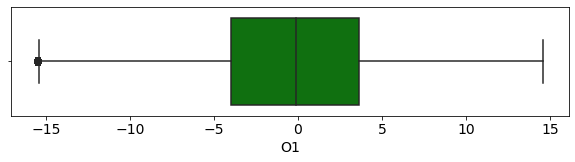



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000,425432.000000
mean,-0.129141,-0.177977,0.131003,0.020151,-0.046854,-0.203528,-0.014829,0.186599,-0.215431,0.055358,-0.013372,0.141537,0.129194,0.144044
std,8.533777,6.591318,6.066541,6.216740,9.545996,8.154561,5.742991,5.624156,6.028541,9.311754,8.070832,10.107576,16.112658,11.529209
min,-25.548300,-19.625400,-17.726600,-16.638400,-25.811800,-20.498400,-14.841200,-14.583200,-15.591800,-225.307300,-230.852900,-234.146200,-225.839400,-232.980200
25%,-5.407900,-4.143200,-3.553450,-3.950000,-6.015900,-5.593200,-3.701500,-3.315200,-3.989825,-3.735075,-3.799200,-4.980500,-4.929300,-4.149900
50%,-0.098488,-0.120110,0.157695,-0.014686,-0.096180,-0.220375,-0.038242,0.139180,-0.092238,0.050628,0.088148,0.157100,0.272200,0.160565
75%,5.084225,3.847625,3.836300,3.976225,5.932800,5.172150,3.649225,3.723825,3.638800,3.837400,3.891300,5.255300,5.598125,4.622025
max,26.074200,18.815500,17.180600,16.637900,25.349500,20.314300,14.817500,14.556600,14.612300,231.753100,161.472100,230.282100,227.730600,234.990100


In [29]:
#Outliear Treatment
g4_df = outliers_treatment(col_list[8],0.95,0.05,g4_df)
outlier_visua(g4_df,8)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## O2 Outliers Treatment

In [30]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[9]+" -------------------")
print(col_describe(col_list[9]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[9]))



--------------Describing Col: --> O2 -------------------
count    425432.000000
mean          0.055358
std           9.311754
min        -225.307300
25%          -3.735075
50%           0.050628
75%           3.837400
max         231.753100
Name: O2, dtype: float64


--------------Checking Quantile-------------------
0.00   -225.307300
0.01    -21.880252
0.05    -11.825625
0.10     -8.221790
0.25     -3.735075
0.50      0.050628
0.70      2.934500
0.90      8.269100
0.95     11.739045
0.99     21.707394
Name: O2, dtype: float64


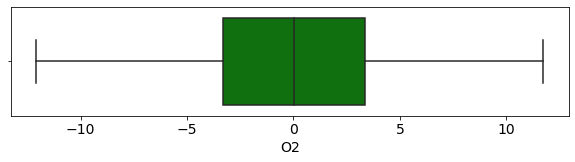



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000,383952.000000
mean,-0.111088,-0.159380,0.130799,0.021348,-0.047039,-0.220528,-0.024971,0.223037,-0.205016,0.008970,0.004445,0.129270,0.127339,0.118364
std,8.385807,6.419326,5.921600,6.101727,9.413174,8.065439,5.596076,5.469702,5.848867,4.974189,7.559872,9.554276,16.087657,11.429835
min,-25.548300,-19.625400,-17.726600,-16.638400,-25.811800,-20.498400,-14.841200,-14.583200,-15.591800,-12.095800,-230.852900,-234.146200,-225.839400,-232.980200
25%,-5.289400,-4.005350,-3.455300,-3.862425,-5.889875,-5.525725,-3.595600,-3.171400,-3.828025,-3.289700,-3.624500,-4.738125,-4.831125,-4.008600
50%,-0.090275,-0.106730,0.157175,-0.018866,-0.098633,-0.241375,-0.046005,0.157015,-0.086689,0.035051,0.093712,0.146225,0.256575,0.126755
75%,5.006625,3.742300,3.733025,3.887200,5.794825,5.070450,3.522500,3.627900,3.504725,3.355000,3.733125,4.996000,5.452400,4.400650
max,26.074200,18.815500,17.178400,16.637900,25.347400,20.311800,14.817500,14.555900,14.612300,11.739000,161.472100,230.282100,227.730600,234.990100


In [31]:

#Outliear Treatment
g4_df = outliers_treatment(col_list[9],0.95,0.05,g4_df)
outlier_visua(g4_df,9)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## P7 Outliers Treatment

In [32]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[10]+" -------------------")
print(col_describe(col_list[10]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[10]))



--------------Describing Col: --> P7 -------------------
count    383952.000000
mean          0.004445
std           7.559872
min        -230.852900
25%          -3.624500
50%           0.093712
75%           3.733125
max         161.472100
Name: P7, dtype: float64


--------------Checking Quantile-------------------
0.00   -230.852900
0.01    -19.440592
0.05    -11.163600
0.10     -7.905280
0.25     -3.624500
0.50      0.093712
0.70      2.870570
0.90      7.892400
0.95     11.065090
0.99     18.889800
Name: P7, dtype: float64


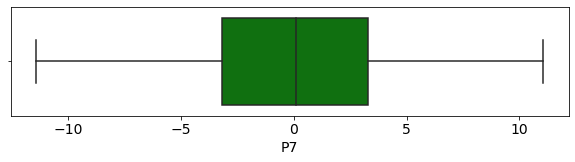



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000,346516.000000
mean,-0.100458,-0.150433,0.129170,0.033014,-0.024368,-0.206893,-0.028954,0.251822,-0.206671,0.021308,0.017890,0.167922,0.144488,0.155923
std,8.252645,6.245711,5.745806,5.924405,9.311934,7.907074,5.451069,5.343062,5.599818,4.865994,4.774290,9.155005,15.813083,11.195678
min,-25.546800,-19.623200,-17.726600,-16.637200,-25.811800,-20.498400,-14.841200,-14.583200,-15.591800,-12.095800,-11.425000,-234.146200,-225.839400,-232.980200
25%,-5.177700,-3.877200,-3.337600,-3.727200,-5.776225,-5.369325,-3.483300,-3.053300,-3.637925,-3.183300,-3.199625,-4.546825,-4.636525,-3.872800
50%,-0.071687,-0.099247,0.156925,-0.013064,-0.079485,-0.235010,-0.047738,0.168990,-0.086847,0.041065,0.077881,0.175230,0.258160,0.141820
75%,4.911425,3.639525,3.615225,3.760000,5.722200,4.938650,3.409700,3.545650,3.313200,3.272000,3.280400,4.874800,5.267450,4.302850
max,26.074200,18.815500,17.178400,16.637900,25.346900,20.311800,14.817500,14.555900,14.612300,11.739000,11.065000,230.282100,227.730600,234.988800


In [33]:

#Outliear Treatment
g4_df = outliers_treatment(col_list[10],0.95,0.05,g4_df)
outlier_visua(g4_df,10)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## P8 Outliers Treatment

In [34]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[11]+" -------------------")
print(col_describe(col_list[11]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[11]))



--------------Describing Col: --> P8 -------------------
count    346516.000000
mean          0.167922
std           9.155005
min        -234.146200
25%          -4.546825
50%           0.175230
75%           4.874800
max         230.282100
Name: P8, dtype: float64


--------------Checking Quantile-------------------
0.00   -234.146200
0.01    -22.368440
0.05    -13.129725
0.10     -9.547650
0.25     -4.546825
0.50      0.175230
0.70      3.789250
0.90      9.925050
0.95     13.555150
0.99     22.640565
Name: P8, dtype: float64


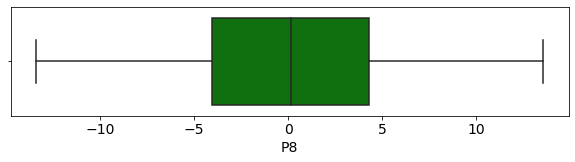



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000,312730.000000
mean,-0.101119,-0.137161,0.144083,0.041859,-0.002026,-0.219759,-0.020344,0.278305,-0.219667,0.015545,0.014240,0.137533,0.128998,0.131123
std,8.117705,6.127843,5.616215,5.777561,9.143061,7.748328,5.326349,5.267837,5.476235,4.755396,4.700879,5.923302,15.291438,10.610920
min,-25.546800,-19.623200,-17.726600,-16.637200,-25.811800,-20.498400,-14.841200,-14.583200,-15.591800,-12.095800,-11.425000,-13.396900,-225.839400,-230.756000
25%,-5.064900,-3.786100,-3.235375,-3.618000,-5.622925,-5.256175,-3.382600,-2.964700,-3.554850,-3.099000,-3.133000,-4.023575,-4.535200,-3.786675
50%,-0.069037,-0.088789,0.166150,-0.007114,-0.060307,-0.245820,-0.043478,0.188370,-0.094671,0.036438,0.072199,0.153550,0.262040,0.129090
75%,4.804200,3.573100,3.536275,3.662675,5.617200,4.796775,3.326875,3.509500,3.205875,3.170075,3.203200,4.301550,5.179475,4.184075
max,26.074200,18.815500,17.178400,16.637900,25.346900,20.311800,14.817500,14.555900,14.612300,11.739000,11.065000,13.555100,227.730600,234.986500


In [35]:

#Outliear Treatment
g4_df = outliers_treatment(col_list[11],0.95,0.05,g4_df)
outlier_visua(g4_df,11)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## T7 Outliers Treatment

In [36]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[12]+" -------------------")
print(col_describe(col_list[12]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[12]))



--------------Describing Col: --> T7 -------------------
count    312730.000000
mean          0.128998
std          15.291438
min        -225.839400
25%          -4.535200
50%           0.262040
75%           5.179475
max         227.730600
Name: T7, dtype: float64


--------------Checking Quantile-------------------
0.00   -225.839400
0.01    -51.333197
0.05    -17.648655
0.10    -10.951670
0.25     -4.535200
0.50      0.262040
0.70      3.944330
0.90     11.942020
0.95     18.542025
0.99     42.961180
Name: T7, dtype: float64


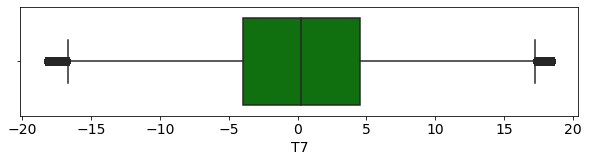



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000,282238.000000
mean,-0.138165,-0.140513,0.146762,0.062822,-0.001515,-0.233540,-0.025937,0.290845,-0.245103,0.010560,0.008250,0.136959,0.293773,0.150808
std,8.013125,6.071952,5.560108,5.721798,9.034080,7.685703,5.290158,5.222672,5.471055,4.744265,4.674124,5.893592,6.899997,10.062681
min,-25.546800,-19.623200,-17.726600,-16.637200,-25.811800,-20.498400,-14.841200,-14.583200,-15.591800,-12.095600,-11.425000,-13.396900,-18.260600,-230.756000
25%,-5.039575,-3.770575,-3.199400,-3.553875,-5.520800,-5.216800,-3.355500,-2.914900,-3.565700,-3.098250,-3.113875,-3.984400,-3.949600,-3.716475
50%,-0.108745,-0.096017,0.165000,0.018035,-0.071704,-0.260855,-0.045615,0.196655,-0.112510,0.033528,0.062416,0.154500,0.243630,0.130985
75%,4.702900,3.541000,3.501675,3.635000,5.502075,4.725275,3.291975,3.479075,3.171200,3.164600,3.172500,4.264050,4.521400,4.118900
max,26.074200,18.815500,17.178400,16.637900,25.343800,20.311800,14.817500,14.555900,14.612300,11.739000,11.065000,13.555100,18.541200,234.896200


In [37]:

#Outliear Treatment
g4_df = outliers_treatment(col_list[12],0.95,0.05,g4_df)
outlier_visua(g4_df,12)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

## T8 Outliers Treatment

In [38]:
#Describing col
print("--------------Describing Col:"+ " --> "+col_list[13]+" -------------------")
print(col_describe(col_list[13]))

#Checking Quantile
print("\n\n--------------Checking Quantile-------------------")
print(check_quantile(col_list[13]))



--------------Describing Col: --> T8 -------------------
count    282238.000000
mean          0.150808
std          10.062681
min        -230.756000
25%          -3.716475
50%           0.130985
75%           4.118900
max         234.896200
Name: T8, dtype: float64


--------------Checking Quantile-------------------
0.00   -230.756000
0.01    -21.831419
0.05    -11.104715
0.10     -7.840830
0.25     -3.716475
0.50      0.130985
0.70      3.184080
0.90      8.341060
0.95     11.329825
0.99     19.033949
Name: T8, dtype: float64


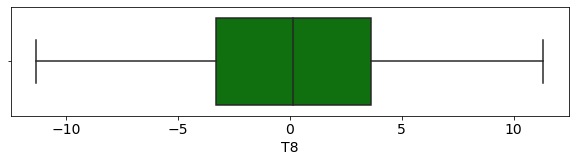



--------------Describing Datafrme after Outlier Treatment-------------------


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000,254719.000000
mean,-0.149447,-0.143145,0.120251,0.042237,-0.008247,-0.254418,-0.042732,0.260550,-0.265512,-0.010081,-0.020105,0.097582,0.270917,0.154087
std,7.908529,5.957086,5.461311,5.646284,8.980960,7.575832,5.209015,5.112859,5.392022,4.667525,4.615291,5.823742,6.794354,4.933480
min,-25.546800,-19.623200,-17.723000,-16.637200,-25.811800,-20.498400,-14.841200,-14.583200,-15.591800,-12.095600,-11.425000,-13.396900,-18.260600,-11.356200
25%,-5.002600,-3.706700,-3.175600,-3.519250,-5.493550,-5.147300,-3.318650,-2.866850,-3.528300,-3.061900,-3.086000,-3.951400,-3.872200,-3.296750
50%,-0.112760,-0.102760,0.138320,-0.002514,-0.083213,-0.275850,-0.058443,0.163840,-0.130580,0.013564,0.038694,0.112570,0.220450,0.115050
75%,4.653800,3.471000,3.418700,3.557550,5.452050,4.611250,3.220150,3.368850,3.087050,3.083000,3.088700,4.147750,4.401950,3.623800
max,26.074200,18.815500,17.178400,16.637900,25.343800,20.311800,14.817500,14.555900,14.612300,11.739000,11.065000,13.555100,18.541200,11.329600


In [39]:

#Outliear Treatment
g4_df = outliers_treatment(col_list[13],0.95,0.05,g4_df)
outlier_visua(g4_df,13)
print("\n\n--------------Describing Datafrme after Outlier Treatment-------------------")
g4_df.describe()

In [41]:
g4_df()

TypeError: ignored

# Previ DF outliers and After Treatment DF

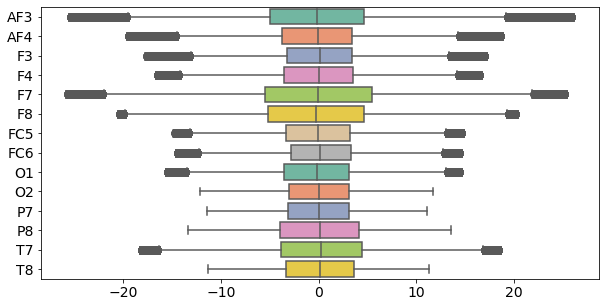

In [40]:
plt.figure(figsize = [10, 5])
sns.boxplot(data = g4_df, orient="h", palette="Set2")
plt.show()